# Лабораторна робота 2.

## Створення штучно синтезованих наборів даних

**Лабораторна робота виконується індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

**Завдання 1: Синтезувати набір даних, який складається з двох лінійно роздільних множин, що можуть бути використані для навчання моделей класифікації.**


**Роз'яснення до завдання 1:**

1. **Опис набору даних:**
   - Набір даних повинен містити дві класифікаційні мітки (клас 1 і клас 2).
   - Кожен об'єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Обидва класи мають бути лінійно роздільні, тобто можна знайти таку пряму, яка розділяє дані двох класів без помилок.
   - Дані повинні бути рівномірно розподілені по всьому простору, але з певним відхиленням для забезпечення реалістичності.
   - Можливі варіанти синтезу:
     - Використання нормального розподілу для генерації точок навколо центроїдів двох класів.
     - Додавання невеликого шуму до кожного класу для забезпечення варіативності даних.

3. **Параметри набору даних:**
   - Кількість точок (об'єктів) у наборі даних: **500** для кожного класу (всього **1000**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y)$ і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **1000** рядків з трьома колонками: $x$, $y$, $class$.
   - Перевірка лінійної роздільності: Побудуйте графік з нанесеними точками і покажіть лінію, яка розділяє два класи.

5. **Додаткові умови:**
- Зробіть аналіз набору даних, побудувавши гістограми розподілу даних для кожного класу окремо.
- Опишіть підходи, які використовувалися для створення набору даних.

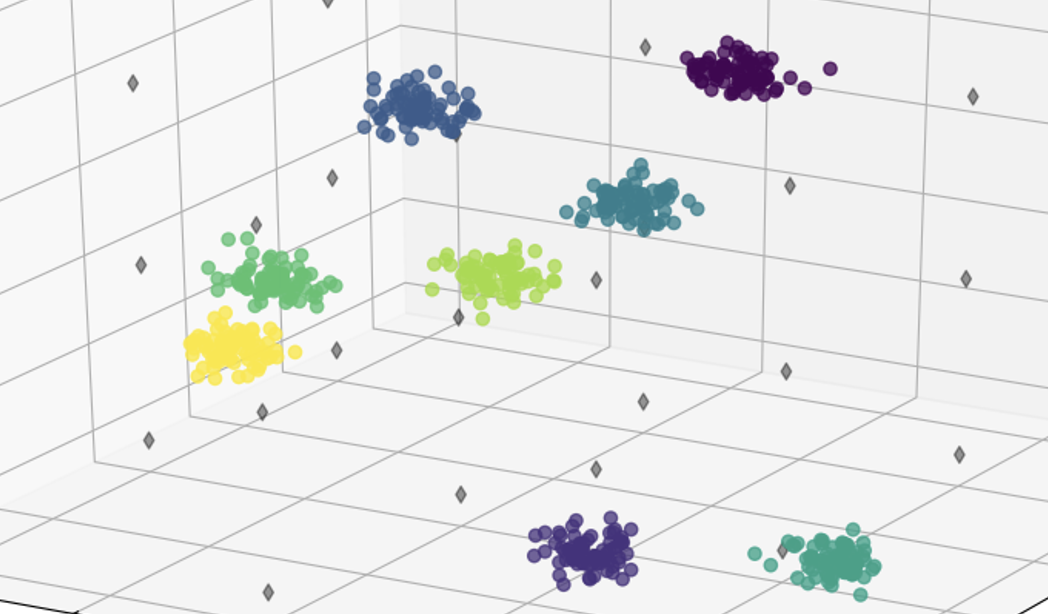

          x         y    class
0  1.472438  2.131479  class_1
1  2.577741  4.247835  class_1
2  3.798886 -0.217571  class_1
3  3.944610  1.477561  class_1
4  2.262261  1.492261  class_1


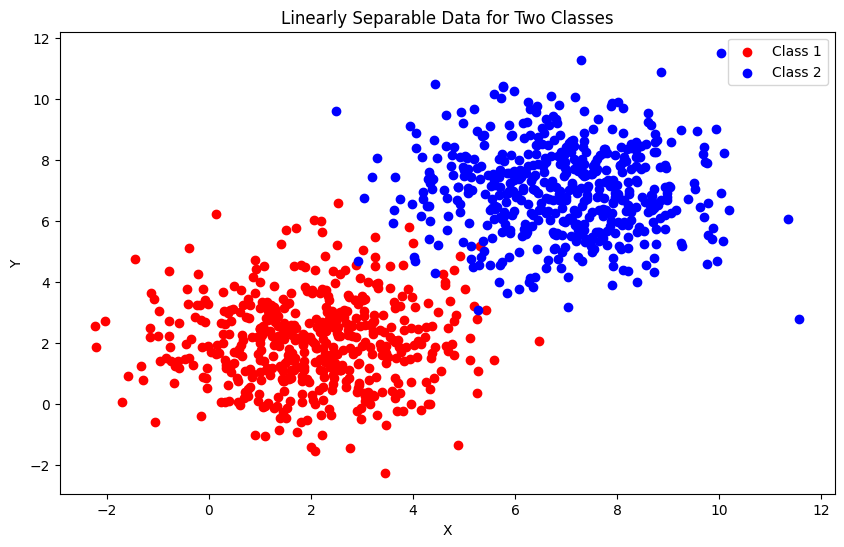

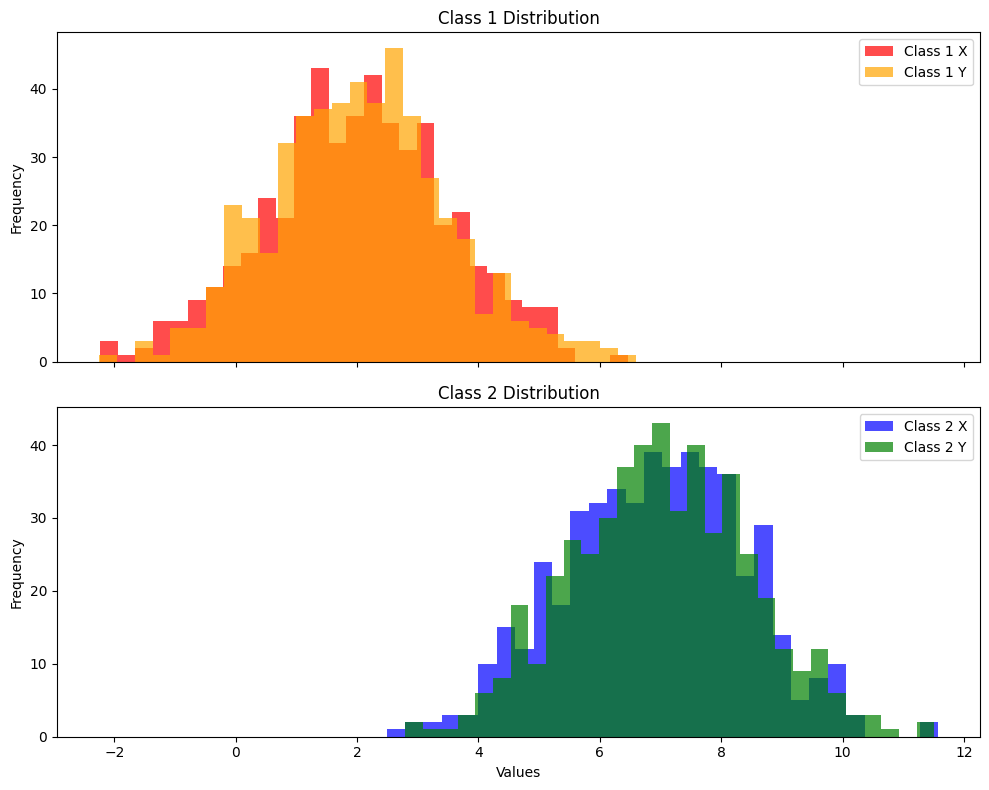

In [3]:
def generate_class_data(center, num_samples, spread, class_label):
    x_points = np.random.normal(center[0], spread, num_samples)
    y_points = np.random.normal(center[1], spread, num_samples)

    labels = np.full(num_samples, class_label)

    data_points = np.column_stack((x_points, y_points))

    return data_points, labels

num_samples = 500
spread = 1.5
center_class1 = [2, 2]
center_class2 = [7, 7]

data_class1, label_class1 = generate_class_data(center_class1, num_samples, spread, 'class_1')
data_class2, label_class2 = generate_class_data(center_class2, num_samples, spread, 'class_2')

df_class1 = pd.DataFrame(data_class1, columns=['x', 'y'])
df_class1['class'] = label_class1

df_class2 = pd.DataFrame(data_class2, columns=['x', 'y'])
df_class2['class'] = label_class2

df_dataset = pd.concat([df_class1, df_class2], axis=0).reset_index(drop=True)

df_dataset.to_csv('synthetic_classification_data.csv', index=False)

print(df_dataset.head())

plt.figure(figsize=(10, 6))
plt.scatter(df_dataset[df_dataset["class"] == 'class_1']['x'], df_dataset[df_dataset["class"] == 'class_1']['y'], color='red', label='Class 1')
plt.scatter(df_dataset[df_dataset["class"] == 'class_2']['x'], df_dataset[df_dataset["class"] == 'class_2']['y'], color='blue', label='Class 2')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linearly Separable Data for Two Classes')
plt.legend()
plt.show()

fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

axs[0].hist(df_dataset[df_dataset['class'] == 'class_1']['x'], bins=30, alpha=0.7, label='Class 1 X', color='red')
axs[0].hist(df_dataset[df_dataset['class'] == 'class_1']['y'], bins=30, alpha=0.7, label='Class 1 Y', color='orange')
axs[0].set_title('Class 1 Distribution')
axs[0].set_ylabel('Frequency')
axs[0].legend()

axs[1].hist(df_dataset[df_dataset['class'] == 'class_2']['x'], bins=30, alpha=0.7, label='Class 2 X', color='blue')
axs[1].hist(df_dataset[df_dataset['class'] == 'class_2']['y'], bins=30, alpha=0.7, label='Class 2 Y', color='green')
axs[1].set_title('Class 2 Distribution')
axs[1].set_xlabel('Values')
axs[1].set_ylabel('Frequency')
axs[1].legend()

plt.tight_layout()
plt.show()

Для створення набору даних, я написав функцію, яка генерує дані для кожного класу. Функція приймає на вхід координати центроїда, навколо якого будуть генеруватися точки, назву класу, кількість точок, а також параметр розсіювання. Спочатку я згенерував точки для координати x, використовуючи нормальний розподіл навколо заданого центроїда. Для координати y я також застосував нормальний розподіл, але з додаванням шуму, щоб забезпечити розсіювання точок та зробити набір даних більш реалістичним.

**Завдання 2: Синтезувати набір даних, який складається з трьох множин (класів), що мають часткове перекриття, для використання в задачах класифікації та аналізу даних.**

**Роз'яснення до завдання 2:**

1. **Опис набору даних:**
   - Набір даних повинен містити три класифікаційні мітки (клас 1, клас 2, клас 3).
   - Кожен об'єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Дані мають утворювати три множини, кожна з яких розподілена навколо свого центру, але з перекриттям з іншими множинами.
   - Кожен клас повинен мати певну ступінь перекриття з іншими класами, що призводить до часткової змішуваності точок з різними мітками.
   - Можливі варіанти синтезу:
     - Використання нормального розподілу для генерації точок навколо центроїдів кожного класу.
     - Додавання більшого шуму або кореляції між точками для збільшення ступеня перекриття.

3. **Параметри набору даних:**
   - Кількість точок (об'єктів) у наборі даних: **300** для кожного класу (всього **900**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y)$ і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **900** рядків з трьома колонками: $x$, $y$, $class$.
   - Побудуйте графік з нанесеними точками для всіх трьох класів, щоб візуалізувати перекриття множин.
   - Перевірте, чи дійсно дані утворюють перекриття між класами, показавши частку точок, які належать до зон перекриття.

5. **Додаткові умови:**
   - Побудуйте кореляційні графіки та гістограми розподілу для кожного класу.
   - Опишіть підходи, які використовувалися для створення набору даних, і обґрунтуйте вибір параметрів.

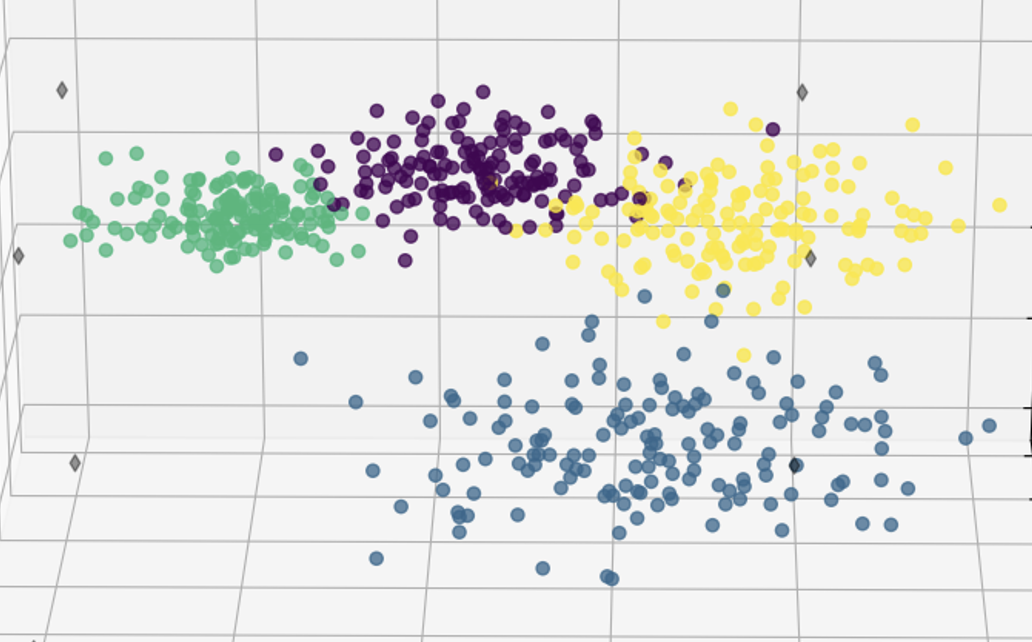

          x         y    class
0  1.019652  2.299680  class_1
1  3.177184  2.707113  class_1
2  2.022827  1.368815  class_1
3  0.122475  2.232787  class_1
4  2.316026  2.731685  class_1


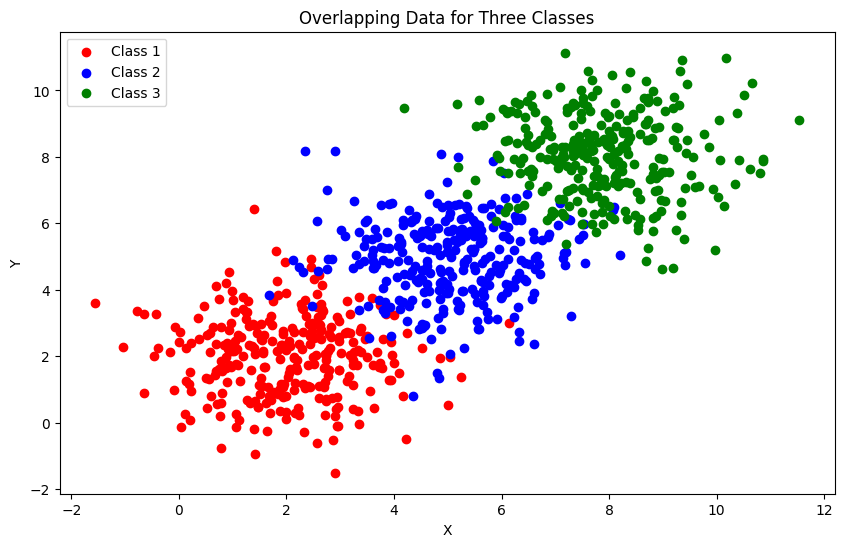

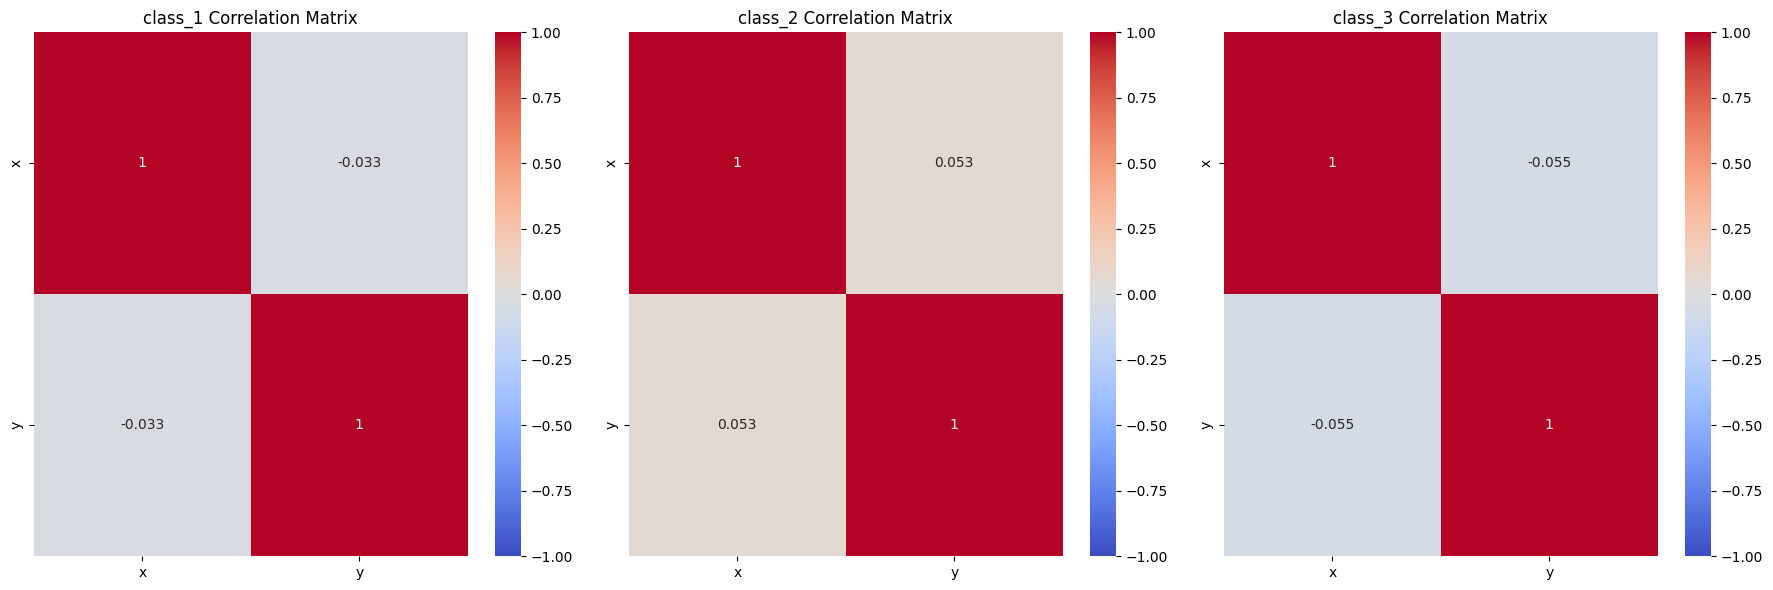

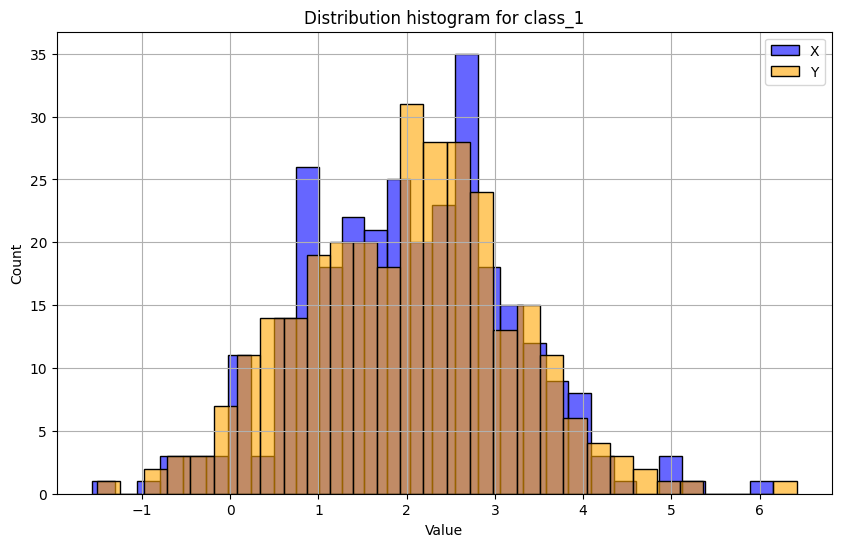

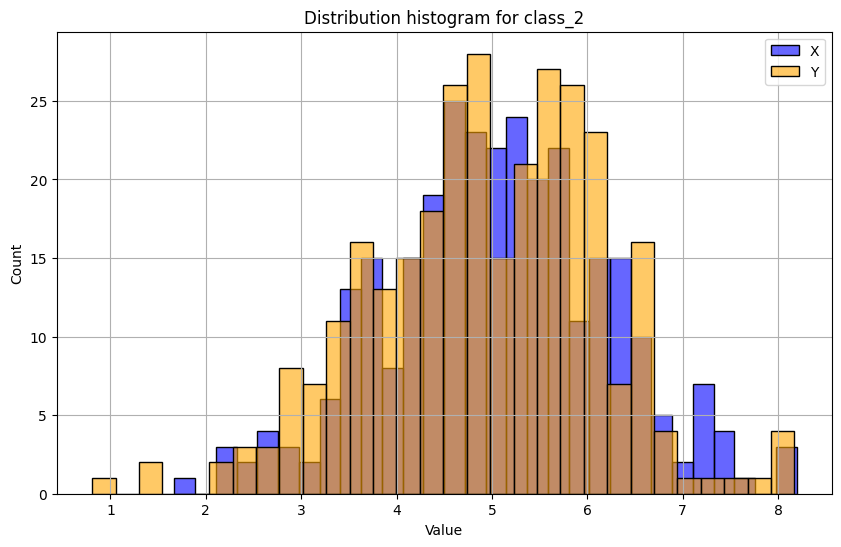

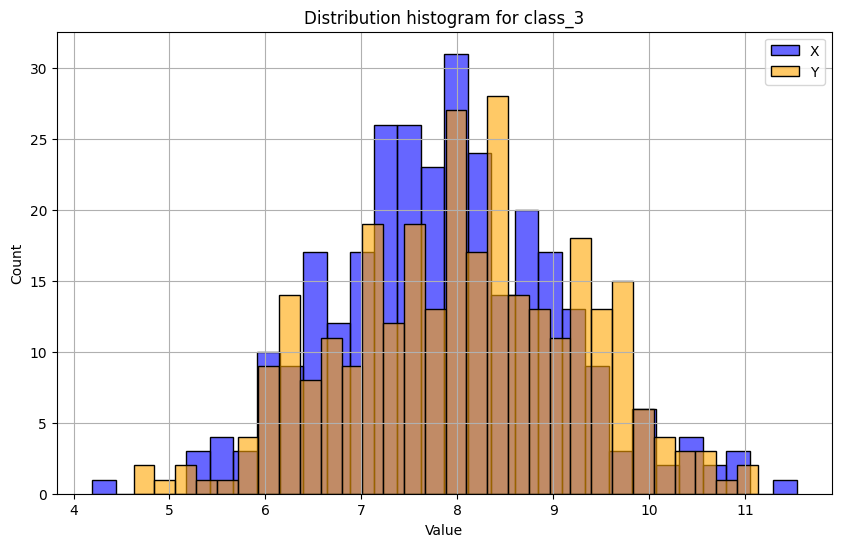

In [4]:
def generate_class_data(center, num_samples, spread, class_label):
    x_points = np.random.normal(center[0], spread, num_samples)
    y_points = np.random.normal(center[1], spread, num_samples)

    labels = np.full(num_samples, class_label)

    data_points = np.column_stack((x_points, y_points))

    return data_points, labels

num_samples = 300
spread = 1.2
center_class1 = [2, 2]
center_class2 = [5, 5]
center_class3 = [8, 8]

data_class1, label_class1 = generate_class_data(center_class1, num_samples, spread, 'class_1')
data_class2, label_class2 = generate_class_data(center_class2, num_samples, spread, 'class_2')
data_class3, label_class3 = generate_class_data(center_class3, num_samples, spread, 'class_3')

df_class1 = pd.DataFrame(data_class1, columns=['x', 'y'])
df_class1['class'] = label_class1

df_class2 = pd.DataFrame(data_class2, columns=['x', 'y'])
df_class2['class'] = label_class2

df_class3 = pd.DataFrame(data_class3, columns=['x', 'y'])
df_class3['class'] = label_class3

df_dataset = pd.concat([df_class1, df_class2, df_class3], axis=0).reset_index(drop=True)

df_dataset.to_csv('three_class_overlapping_data.csv', index=False)

print(df_dataset.head())

plt.figure(figsize=(10, 6))
plt.scatter(df_dataset[df_dataset["class"] == 'class_1']['x'], df_dataset[df_dataset["class"] == 'class_1']['y'], color='red', label='Class 1')
plt.scatter(df_dataset[df_dataset["class"] == 'class_2']['x'], df_dataset[df_dataset["class"] == 'class_2']['y'], color='blue', label='Class 2')
plt.scatter(df_dataset[df_dataset["class"] == 'class_3']['x'], df_dataset[df_dataset["class"] == 'class_3']['y'], color='green', label='Class 3')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Overlapping Data for Three Classes')
plt.legend()
plt.show()

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

class_names = ["class_1", "class_2", "class_3"]
for i, class_name in enumerate(class_names):
    corr_class = df_dataset[df_dataset["class"] == class_name][['x', 'y']].corr()
    sns.heatmap(corr_class, annot=True, cmap='coolwarm', ax=axs[i], vmin=-1, vmax=1)
    axs[i].set_title(f'{class_name} Correlation Matrix')

plt.tight_layout()
plt.show()

for class_name in class_names:
    plt.figure(figsize=(10, 6))

    sns.histplot(df_dataset[df_dataset['class'] == class_name]['x'], bins=30, color='blue', alpha=0.6, label='X')
    sns.histplot(df_dataset[df_dataset['class'] == class_name]['y'], bins=30, color='orange', alpha=0.6, label='Y')

    plt.title(f'Distribution histogram for {class_name}')
    plt.xlabel('Value')
    plt.ylabel('Count')
    plt.legend()
    plt.grid(True)
    plt.show()

**Завдання 3: Синтезувати набір даних, який складається з двох множин у формі "тор в торі", де одна множина має форму внутрішнього тора, а інша — зовнішнього тора.**

**Роз'яснення до завдання 3:**

1. **Опис набору даних:**
   - Набір даних повинен містити дві класифікаційні мітки (клас 1 і клас 2).
   - Кожен об'єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Дані повинні утворювати дві множини у формі тора: одна множина повинна бути розташована всередині іншої (тобто, "тор в торі").
   - Внутрішній тор (клас 1) повинен мати менший радіус і ширину, ніж зовнішній тор (клас 2).
   - Розподіл точок повинен бути рівномірним вздовж кожного тора з додаванням невеликого шуму для забезпечення варіативності.

3. **Параметри набору даних:**
   - Кількість точок (об'єктів) у наборі даних: **500** для кожного класу (всього **1000**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y) $і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **1000** рядків з трьома колонками: $x$, $y$, $class$.
   - Побудуйте графік з нанесеними точками для обох класів, щоб візуалізувати форму "тор в торі".
   - Перевірте розподіл точок уздовж кожного тора, побудувавши радіальні гістограми для кожного класу.

5. **Додаткові умови:**
   - Побудуйте окремі графіки, які демонструють розподіл даних для кожного тора окремо.
   - Опишіть процес генерації даних та поясніть вибір параметрів для кожного тора.

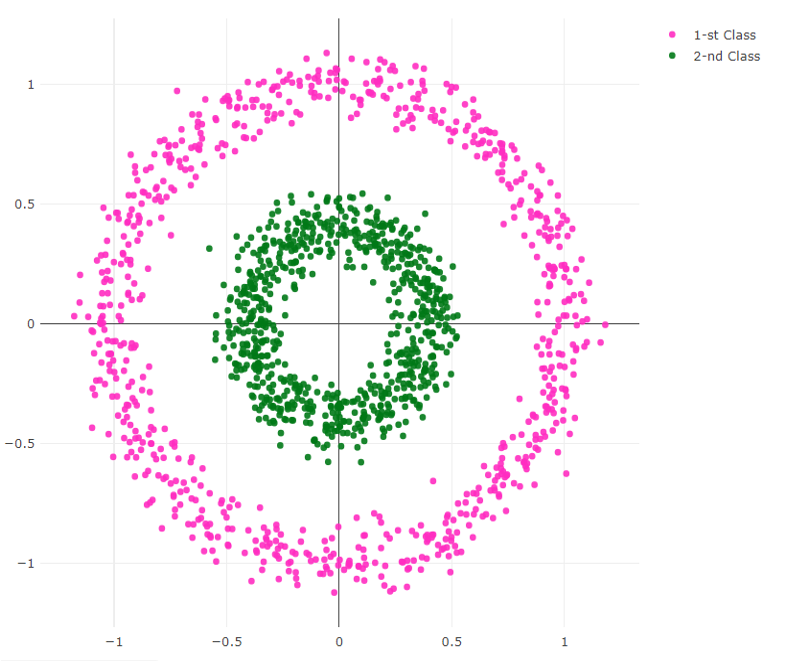

          x         y  class
0 -0.385142  0.114563    0.0
1  0.132667 -0.449559    0.0
2  0.425719  0.208051    0.0
3 -0.505874  0.050958    0.0
4 -0.099049  0.532796    0.0


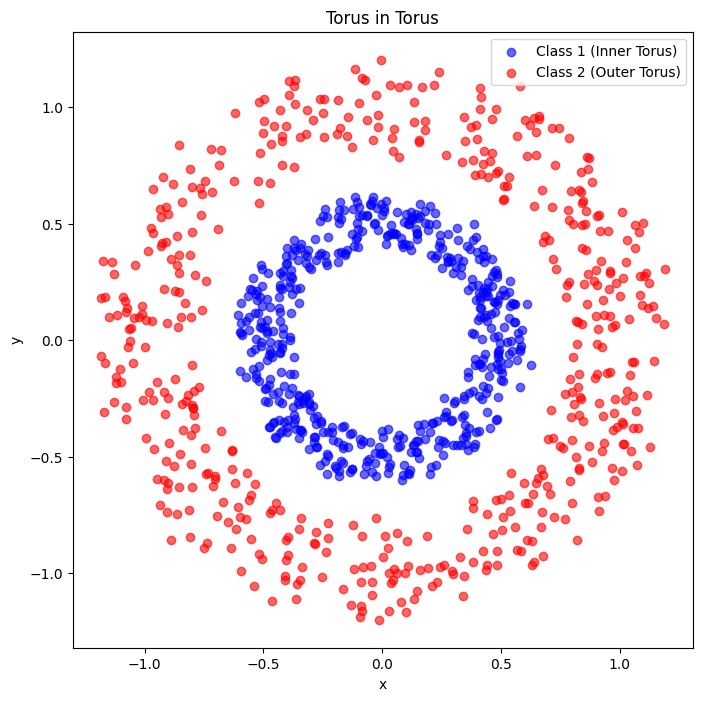

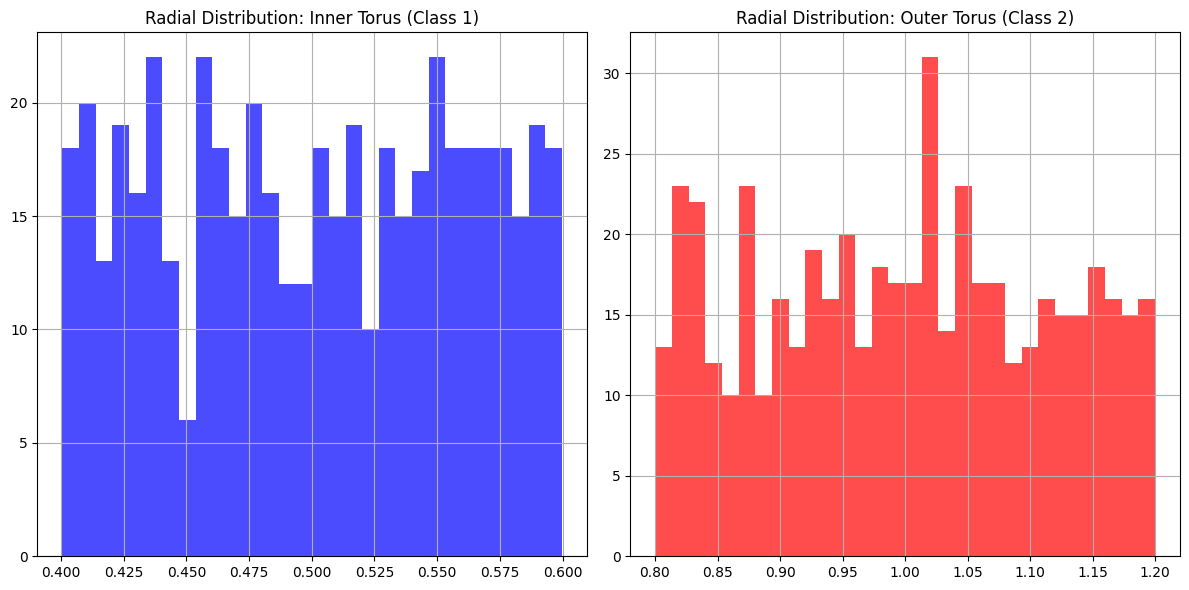

In [5]:
n_samples = 500
noise = 0.02

inner_radius = 0.5
inner_width = 0.1

angles_inner = np.random.uniform(0, 2 * np.pi, n_samples)
r_inner = inner_radius + inner_width * np.random.uniform(-1, 1, n_samples)
x_inner = r_inner * np.cos(angles_inner) + noise * np.random.randn(n_samples)
y_inner = r_inner * np.sin(angles_inner) + noise * np.random.randn(n_samples)
class_inner = np.zeros(n_samples)

outer_radius = 1
outer_width = 0.2

angles_outer = np.random.uniform(0, 2 * np.pi, n_samples)
r_outer = outer_radius + outer_width * np.random.uniform(-1, 1, n_samples)
x_outer = r_outer * np.cos(angles_outer) + noise * np.random.randn(n_samples)
y_outer = r_outer * np.sin(angles_outer) + noise * np.random.randn(n_samples)
class_outer = np.ones(n_samples)  # Class label 1 for outer torus

x = np.concatenate([x_inner, x_outer])
y = np.concatenate([y_inner, y_outer])
labels = np.concatenate([class_inner, class_outer])

torus_data = pd.DataFrame({'x': x, 'y': y, 'class': labels})

torus_data.to_csv('torus_in_torus_data.csv', index=False)

print(torus_data.head())

plt.figure(figsize=(8, 8))
plt.scatter(x_inner, y_inner, color='blue', label='Class 1 (Inner Torus)', alpha=0.6)
plt.scatter(x_outer, y_outer, color='red', label='Class 2 (Outer Torus)', alpha=0.6)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Torus in Torus')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(r_inner, bins=30, color='blue', alpha=0.7)
plt.title('Radial Distribution: Inner Torus (Class 1)')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist(r_outer, bins=30, color='red', alpha=0.7)
plt.title('Radial Distribution: Outer Torus (Class 2)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Генерація даних для "Тор в торі"

### Параметри генерації:

- `n_samples = 500` - Кількість точок для кожного тора.
- `noise = 0.01` - Рівень шуму, що додається до координат точок для випадкових розміщень.
- `inner_radius = 0.5` - Радіус внутрішнього тора.
- `inner_width = 0.1` - Ширина внутрішнього тора, що визначає відхилення від основного радіусу.
- `outer_radius = 1` - Радіус зовнішнього тора.
- `outer_width = 0.1` - Ширина зовнішнього тора, що визначає відхилення від основного радіусу.

### Процес генерації даних для кожного тора:

1. `angles_inner` - Генерує кути від 0 до 360 градусів для внутрішнього тора.
2. `r_inner` - Генерує радіуси точок всередині тора, додаючи варіативність.
3. `x_inner` - Обчислює координати x точок внутрішнього тора з доданим шумом для випадкових відхилень.
4. `y_inner` - Обчислює координати y точок внутрішнього тора з доданим шумом.

### Процес генерації для зовнішнього тора:

Процес для другого (зовнішнього) тора аналогічний першому, але з використанням параметрів `outer_radius` та `outer_width`.

---

**Візуалізація:**

Після генерації точок для обох класів, можна побудувати графік для наочного відображення структури "тор в торі". Це дозволить побачити рівномірний розподіл точок та їх перекриття між класами.


**Завдання 4: Синтезувати набір даних, який складається з двох множин, що утворюють подвійну спіраль, де одна спіраль огортає іншу.**

**Роз'яснення до завдання 4:**

1. **Опис набору даних:**
   - Набір даних повинен містити дві класифікаційні мітки (клас 1 і клас 2).
   - Кожен об'єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Дані повинні утворювати дві спіралі, закручені одна в іншу, так щоб кожна спіраль відповідала одному з класів.
   - Спіралі повинні мати протилежні напрямки закручування (одна за годинниковою стрілкою, інша — проти).
   - Кожна спіраль повинна бути рівномірно заповнена точками з невеликим додаванням шуму для варіативності даних.

3. **Параметри набору даних:**
   - Кількість точок (об'єктів) у наборі даних: **500** для кожного класу (всього **1000**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y)$ і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **1000** рядків з трьома колонками: $x$, $y$, $class$.
   - Побудуйте графік з нанесеними точками для обох спіралей, щоб візуалізувати структуру "спіраль у спіралі".
   - Проаналізуйте відмінності у розподілі точок для обох класів та оцініть складність їх розділення.

5. **Додаткові умови:**
   - Створіть окремі графіки, що показують як закручується кожна спіраль.
   - Опишіть процес генерації даних, включаючи параметри, що використовувалися для визначення форми спіралей.

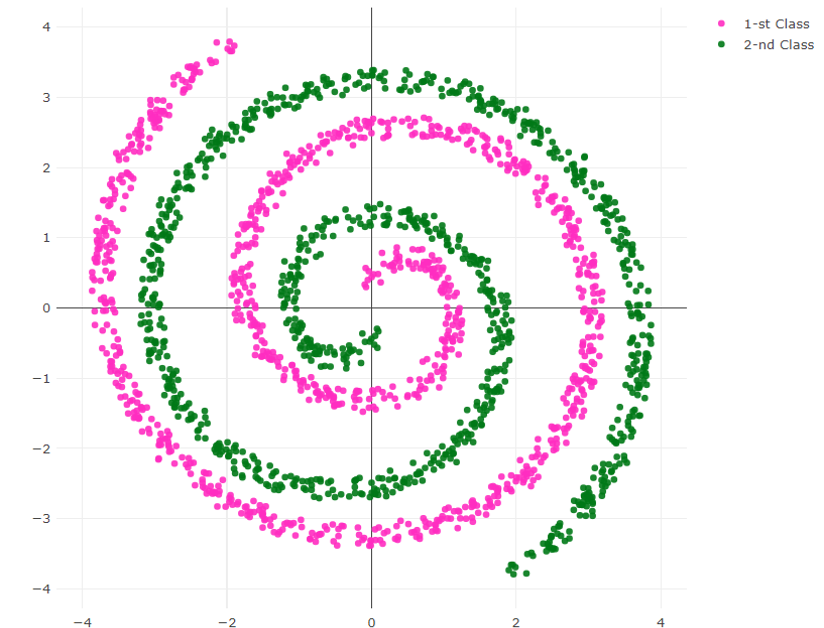

          x         y  class
0  0.042235 -0.011903    0.0
1  0.036783 -0.018197    0.0
2  0.094986 -0.005926    0.0
3  0.060819 -0.019236    0.0
4  0.046857 -0.002675    0.0


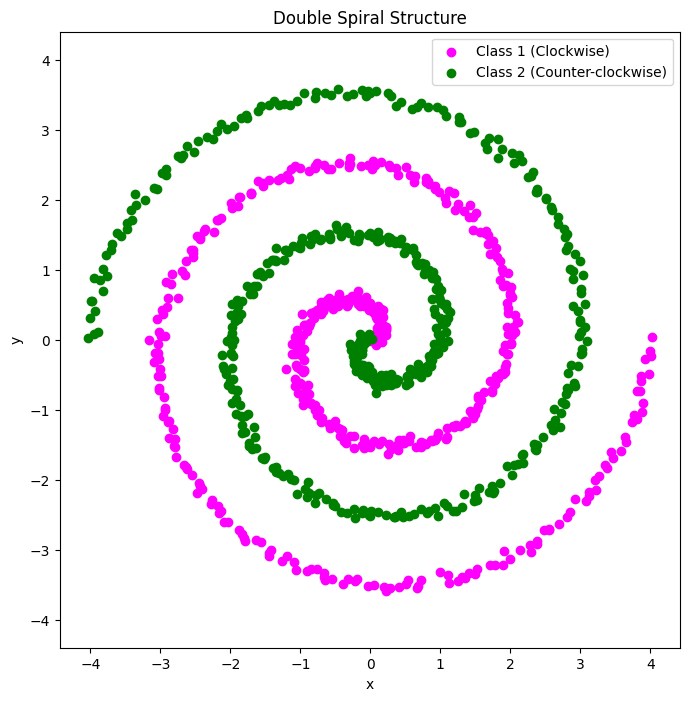

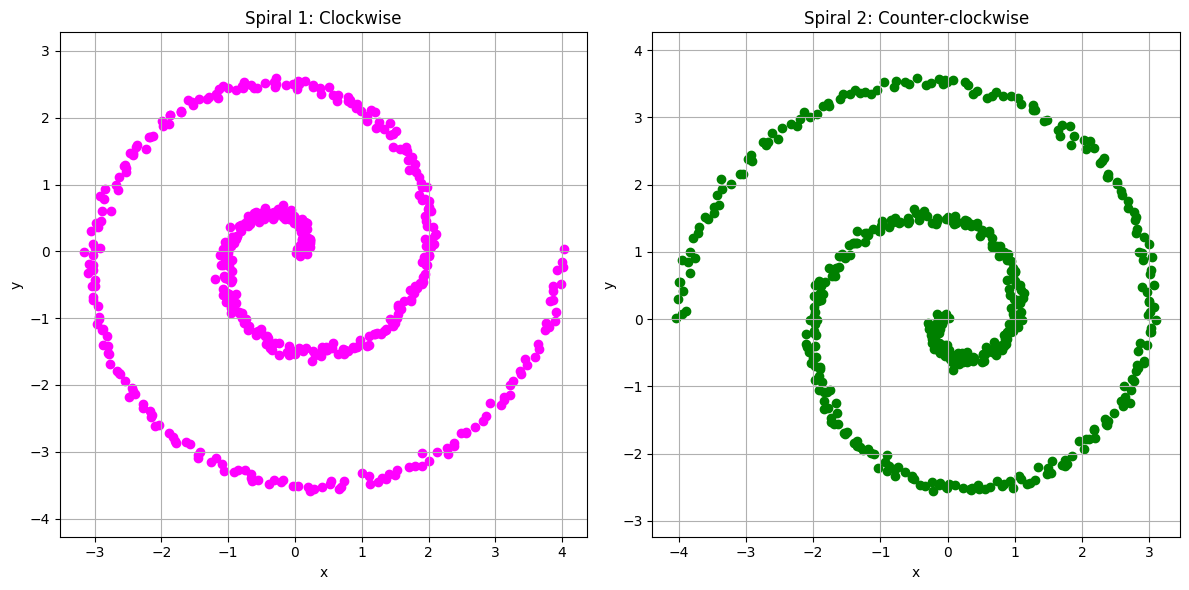

In [6]:
number_of_points = 500
noise = 0.05
n_turns = 4

theta_class_1 = np.linspace(0, n_turns * np.pi, number_of_points)
radius_class_1 = np.linspace(0, 4, number_of_points)
x_class_1 = radius_class_1 * np.cos(theta_class_1) + np.random.randn(number_of_points) * noise
y_class_1 = radius_class_1 * np.sin(theta_class_1) + np.random.randn(number_of_points) * noise
class_1_labels = np.zeros(number_of_points)

theta_class_2 = np.linspace(0, n_turns * np.pi, number_of_points)
radius_class_2 = np.linspace(0, 4, number_of_points)
x_class_2 = radius_class_2 * np.cos(theta_class_2 + np.pi) + np.random.randn(number_of_points) * noise
y_class_2 = radius_class_2 * np.sin(theta_class_2 + np.pi) + np.random.randn(number_of_points) * noise
class_2_labels = np.ones(number_of_points)

x = np.concatenate((x_class_1, x_class_2))
y = np.concatenate((y_class_1, y_class_2))
labels = np.concatenate((class_1_labels, class_2_labels))

spiral_data = pd.DataFrame({"x": x, "y": y, "class": labels})

spiral_data.to_csv('spiral_in_spiral_data.csv', index=False)

print(spiral_data.head())

plt.figure(figsize=(8, 8))
plt.scatter(x_class_1, y_class_1, color='magenta', label='Class 1 (Clockwise)')
plt.scatter(x_class_2, y_class_2, color='green', label='Class 2 (Counter-clockwise)')
plt.title('Double Spiral Structure')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.axis('equal')
plt.show()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(x_class_1, y_class_1, color='magenta', label='Class 1')
plt.title('Spiral 1: Clockwise')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(x_class_2, y_class_2, color='green', label='Class 2')
plt.title('Spiral 2: Counter-clockwise')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.grid(True)

plt.tight_layout()
plt.show()

**Завдання 5: Синтезувати кілька наборів даних, що описують траєкторії системи Лоренца з різними параметрами, дослідити вплив параметрів на динаміку системи та візуалізувати результати.**


### 5.1: Теоретичне підґрунтя

**Опис системи Лоренца:**
Система Лоренца — це набір трьох нелінійних диференціальних рівнянь, що описують динаміку тривимірної системи з хаотичною поведінкою. Вона визначається такими рівняннями:

$$
\frac{dx}{dt} = \sigma (y - x)
$$

$$
\frac{dy}{dt} = x (\rho - z) - y
$$

$$
\frac{dz}{dt} = xy - \beta z
$$

Де:
- $(x, y, z)$ — змінні стану системи.
- $\sigma$ — параметр, що відповідає за швидкість зміни (часто називають "параметр Прандтля").
- $\rho$ — параметр, що відповідає за різницю температур у системі (відповідає за інтенсивність конвекції).
- $\beta$  — параметр, що відповідає за співвідношення розмірів.

**Роз'яснення до завдання:**
- Згенерувати дані для системи Лоренца за допомогою різних значень параметрів $\sigma$, $\rho$ та $\beta$.
- Проаналізувати вплив зміни параметрів на траєкторії системи.
- Візуалізувати результати в тривимірному просторі для кожного набору даних.

### 5.2: Генерація та візуалізація набору даних

**Що треба зробити:**

1. **Генерація даних:**
   - Вибрати декілька різних комбінацій параметрів $\sigma$, $\rho$ та $\beta$.
   - Використовуючи числовий метод (наприклад, метод Рунге-Кутти 4-го порядку), згенерувати траєкторії системи Лоренца для кожного набору параметрів.

2. **Візуалізація:**
   - Для кожного набору параметрів побудувати тривимірні графіки траєкторій.
   - Відобразити траєкторії в просторі $(x, y, z)$.

3. **Аналіз:**
   - Порівняти результати для різних наборів параметрів.
   - Описати, як зміна кожного з параметрів впливає на поведінку системи (наприклад, перехід від стабільного до хаотичного режиму).

**Очікуваний результат:**
- Кілька наборів даних, що описують траєкторії системи Лоренца з різними параметрами (мінімум 3).
- Візуалізації цих траєкторій у тривимірному просторі.
- Аналіз і опис впливу параметрів на динаміку системи.

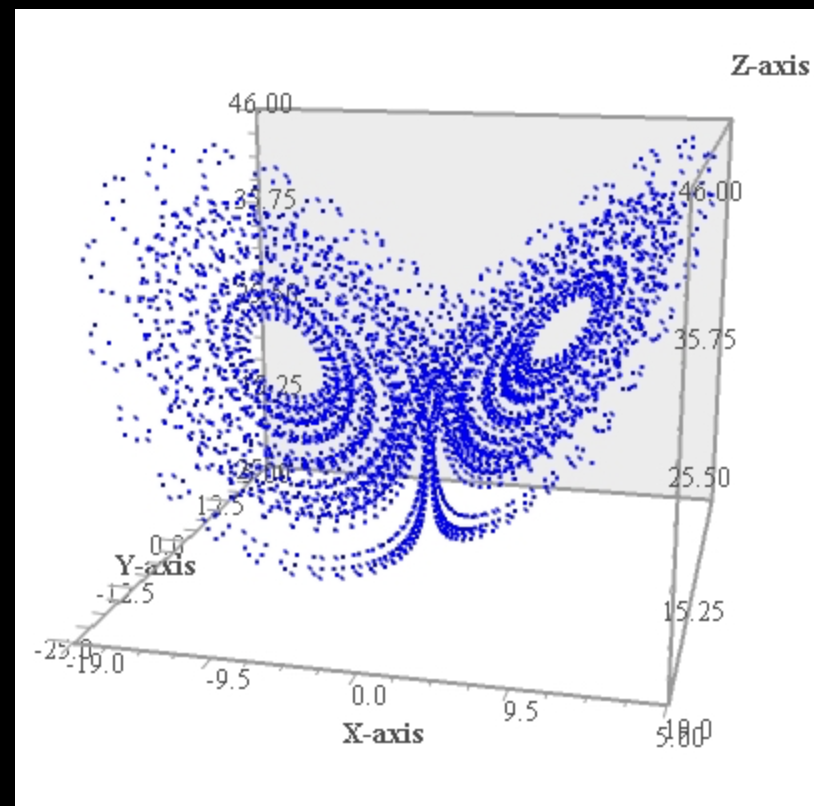

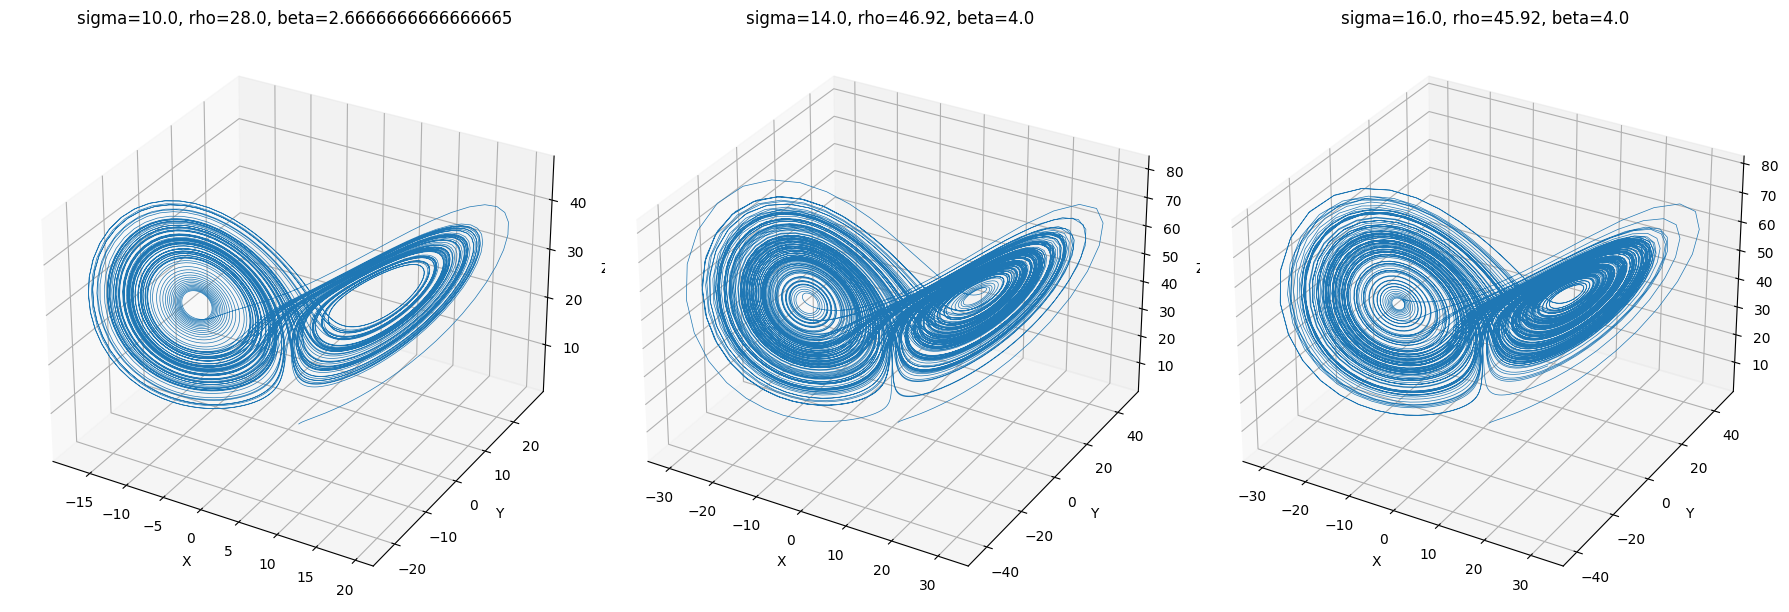

In [7]:
def lorenz_system(state, sigma, rho, beta):
    x, y, z = state
    dx_dt = sigma * (y - x)
    dy_dt = x * (rho - z) - y
    dz_dt = x * y - beta * z
    return np.array([dx_dt, dy_dt, dz_dt])

def runge_kutta_4(func, state, dt, sigma, rho, beta):
    k1 = dt * func(state, sigma, rho, beta)
    k2 = dt * func(state + k1 / 2, sigma, rho, beta)
    k3 = dt * func(state + k2 / 2, sigma, rho, beta)
    k4 = dt * func(state + k3, sigma, rho, beta)
    return state + (k1 + 2 * k2 + 2 * k3 + k4) / 6

number_of_steps = 10000
dt = 0.01
initial_state = np.array([1.0, 1.0, 1.0])

parameters = [
    {"sigma": 10.0, "rho": 28.0, "beta": 8.0 / 3.0},
    {"sigma": 14.0, "rho": 46.92, "beta": 4.0},
    {"sigma": 16.0, "rho": 45.92, "beta": 4.0}
]

trajectories = []

for params in parameters:
    sigma = params["sigma"]
    rho = params["rho"]
    beta = params["beta"]
    state = initial_state.copy()
    trajectory = np.zeros((number_of_steps, 3))
    for i in range(number_of_steps):
        trajectory[i] = state
        state = runge_kutta_4(lorenz_system, state, dt, sigma, rho, beta)
    trajectories.append({"params": params, "trajectory": trajectory})

fig = plt.figure(figsize=(18, 6))

for i, data in enumerate(trajectories):
    ax = fig.add_subplot(1, 3, i + 1, projection='3d')
    trajectory = data["trajectory"]
    params = data["params"]
    ax.plot(trajectory[:, 0], trajectory[:, 1], trajectory[:, 2], lw=0.5)
    ax.set_title(f"sigma={params['sigma']}, rho={params['rho']}, beta={params['beta']}")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")

plt.tight_layout()
plt.show()